# The Meissner Effect in Tin

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # import stats package

## Pressure to Temperature Converter

In [23]:
def pressure2temp(p_mbar): ## converts pressure of helium in mbar to temperature in K
    x = np.log10(p_mbar) ##note that log10() is used as opposed to log()
    T = 1.24177 + 0.23793*(x) + 0.36207*(x**2) - 0.33188*(x**3) + 0.20738*(x**4) - 0.05294*(x**5) + 0.00552*(x**6)
    return T

## The Meissner Effect

In [19]:
##Probe B quantities
n = 676
A = 19*39

N.B. files in the repository "./../data/meissner_effect" with the extension .dat are renamed (remove .dat extension)

In [ ]:
mylist = os.listdir("./../data/meissner_effect")

In [47]:
mylist.remove('ProbeB480mbar')

In [48]:
press_list = []

for i in range(len(mylist)):
    x = mylist[i]
    x = x[6:]
    x = x[:-4]
    press_list.append(int(x))
        
press_array = np.array(sorted(press_list))
temp_array = pressure2temp(press_array)

In [49]:
temp_array

array([1.33872734, 1.85692337, 2.09757858, 2.23595127, 2.37932831,
       2.47796682, 2.63507776, 2.76307488, 2.84883032, 2.94210563,
       2.99395311, 3.07985859, 3.2010981 , 3.28905475, 3.35073205,
       3.39007314, 3.44670592, 3.48301723, 3.50077196, 3.53552727,
       3.59410606, 3.61840386, 3.6962509 , 3.83955603, 3.87981397,
       4.2214935 ])

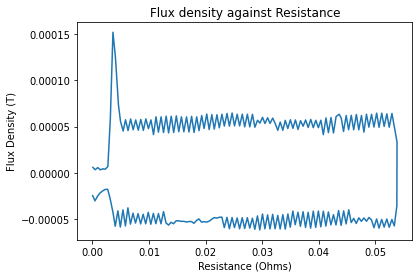

In [50]:
ProbeB2mbar = pd.read_csv("./../data/meissner_effect/ProbeB480mbar", "\t")
ProbeB2mbar = ProbeB2mbar.drop(ProbeB2mbar.index[0])
shv_2mB = ProbeB2mbar['Shunt Voltage (V)'].values.astype(float)
sv_2mB = ProbeB2mbar['Sample Voltage (V)'].values.astype(float)

v_per_a = 0.5
tesla_per_a = 0.018
current = 1.002


shv_2mB = np.array(shv_2mB)
sv_2mB = np.array(sv_2mB)
b_2mB = (shv_2mB/v_per_a)*tesla_per_a
r_2mB = sv_2mB/current
    
plt.plot(b_2mB, sv_2mB)
plt.title('Flux density against Resistance')
plt.xlabel('Resistance (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Flux Density (T)') # Plot a label on x axis of Xlabel on graph
plt.show()

In [53]:
shv_array = [] ##shunt voltage array
sv_array = [] ##sample voltage array
isv_array = [] ##integrated sample voltage array
b_array = [] ##flux density array
r_array = [] ##resistance array

v_per_a = 0.5
tesla_per_a = 0.018
current = 1.002

for i in range(len(press_array)): ##len(press_array)
    name = "ProbeB" + str(press_array[i]) + "mbar"
    path = "./../data/meissner_effect/" + name
    
    df = pd.read_csv(path, "\t")
    df = df.drop(df.index[0])
    shv = df['Shunt Voltage (V)'].values.astype(float)
    sv = df['Sample Voltage (V)'].values.astype(float)
    isv = df['Integrated Sample Voltage (V)'].values.astype(float)
    
    shv = np.array(shv)
    sv = np.array(sv)
    isv = np.array(isv)
    
    
    b = (shv/v_per_a)*tesla_per_a
    r = sv/current
    
    shv_array.append(shv)
    sv_array.append(sv)
    isv_array.append(isv)
    b_array.append(b)
    r_array.append(r)

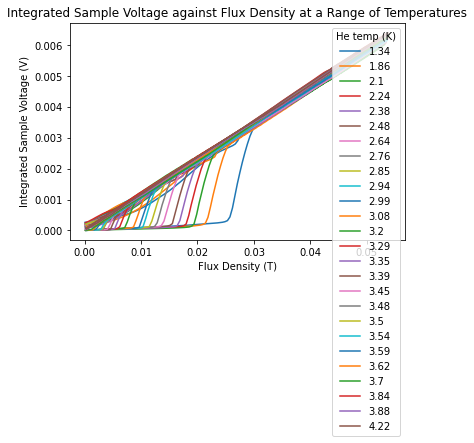

In [56]:
##Sample Voltage against Shunt Voltage at a Range of Pressures
ranges = range(len(b_array)) ## range(10,len(b_array))

for i in ranges: ##len(b_array)
    plt.plot(b_array[i], isv_array[i])

plt.title('Integrated Sample Voltage against Flux Density at a Range of Temperatures')
plt.xlabel('Flux Density (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Integrated Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
plt.legend(np.round(temp_array[ranges], decimals =2), title = "He temp (K)", loc = 1)
plt.show()